In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import datetime

In [2]:
start_time = datetime.datetime.now()
print("Start Time: ", start_time)

Start Time:  2021-04-07 23:30:58.188862


## 01. Bill Authentication Dataset

In [3]:
df = pd.read_csv("bill_authentication.csv")

In [4]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
df.shape

(1372, 5)

In [6]:
df.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

In [7]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [8]:
df.duplicated().sum()

24

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.shape

(1348, 5)

In [11]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,0.445785,1.909039,1.413578,-1.168712,0.452522
std,2.862906,5.868600,4.328365,2.085877,0.497925
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.786650,-1.627000,-1.545600,-2.393100,0.000000
50%,0.518735,2.334150,0.605495,-0.578890,0.000000
75%,2.853250,6.796025,3.199800,0.403863,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [12]:
df.describe(percentiles = [0.005, 0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 0.995])

,Variance,Skewness,Curtosis,Entropy,Class
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,0.445785,1.909039,1.413578,-1.168712,0.452522
std,2.862906,5.868600,4.328365,2.085877,0.497925
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
0.5%,-6.537757,-13.122628,-5.065052,-7.588700,0.000000
1%,-6.243336,-12.934186,-4.924382,-7.503400,0.000000
5%,-4.179035,-8.358060,-4.106520,-5.271435,0.000000
10%,-3.348650,-6.550300,-3.433290,-4.189690,0.000000
25%,-1.786650,-1.627000,-1.545600,-2.393100,0.000000
50%,0.518735,2.334150,0.605495,-0.578890,0.000000


In [13]:
df.dtypes

Variance    float64
Skewness    float64
Curtosis    float64
Entropy     float64
Class         int64
dtype: object

In [14]:
df['Class'].value_counts()

0    738
1    610
Name: Class, dtype: int64

In [15]:
df.isin([0]).any()

Variance    False
Skewness    False
Curtosis    False
Entropy     False
Class        True
dtype: bool

### Removing outliers using std dev

In [16]:
# from scipy import stats

# z_scores = stats.zscore(df.drop('Class', axis = 1))
# abs_z_scores = np.abs(z_scores)
# filtered_entries = (abs_z_scores < 3).all(axis=1)
# df_new = df[filtered_entries]

In [17]:
# df_new.shape

In [18]:
# df = df_new

array([[<AxesSubplot:title={'center':'Variance'}>,
        <AxesSubplot:title={'center':'Skewness'}>],
       [<AxesSubplot:title={'center':'Curtosis'}>,
        <AxesSubplot:title={'center':'Entropy'}>],
       [<AxesSubplot:title={'center':'Class'}>, <AxesSubplot:>]],
      dtype=object)

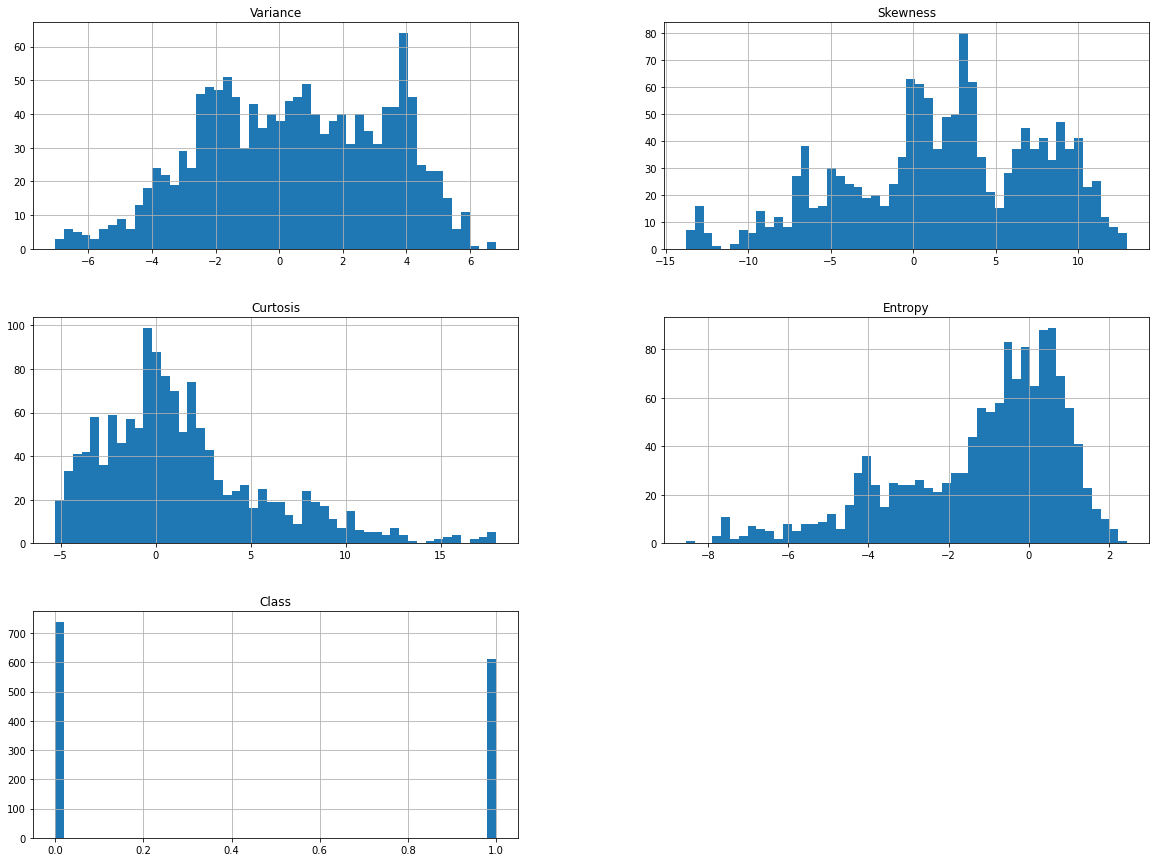

In [19]:
df.hist(bins = 50, figsize = (20, 15))

<AxesSubplot:>

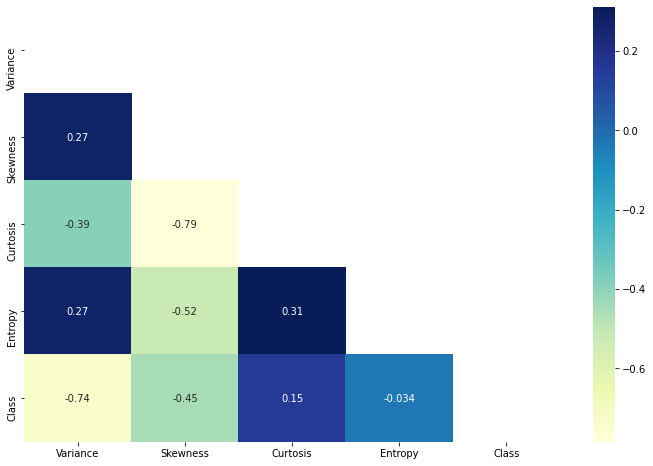

In [20]:
corr_mat = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat, mask = np.triu(corr_mat), cmap="YlGnBu", annot = True)

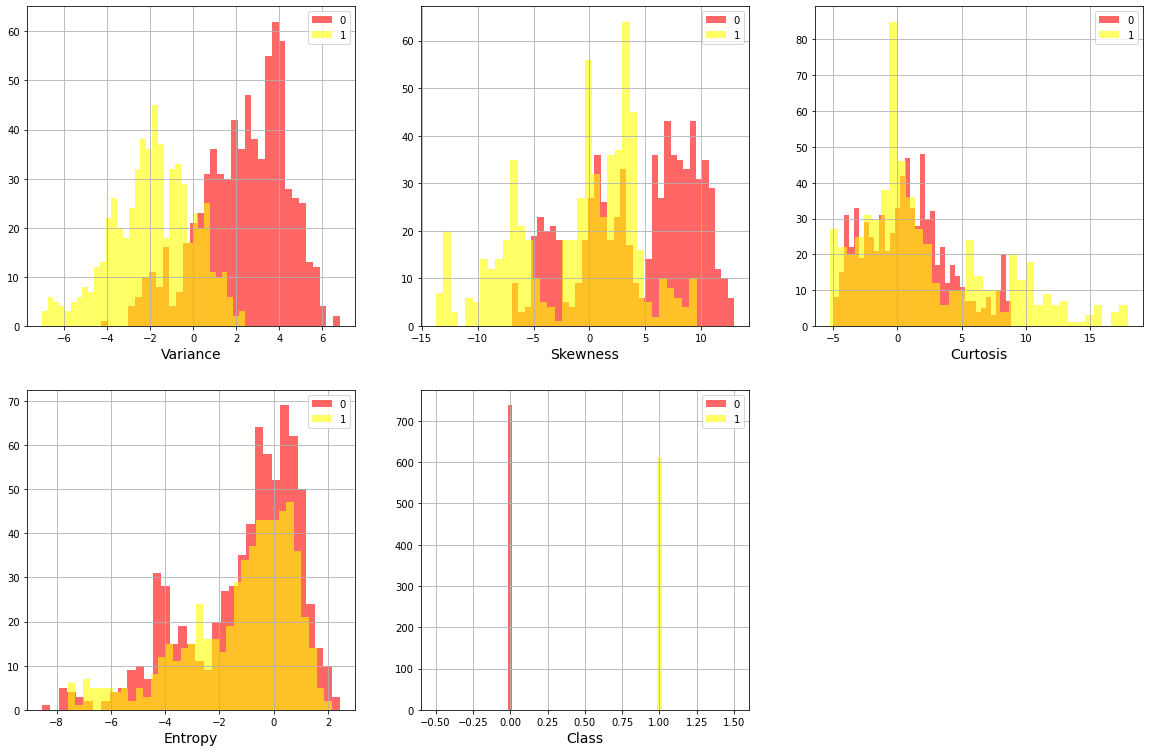

In [21]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(df, 1):
    plt.subplot(3, 3, i)
    df[df['Class'] == 0][column].hist(bins=35, color='red', label='0', alpha=0.6)
    df[df['Class'] == 1][column].hist(bins=35, color='yellow', label='1', alpha=0.6)
    plt.legend()
    plt.xlabel(column, fontsize = 14)
    print()

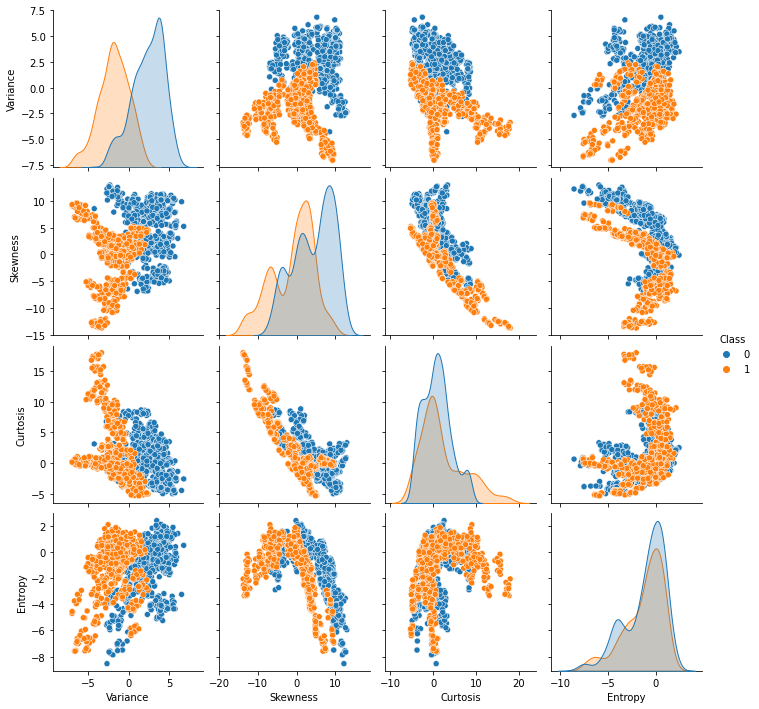

In [22]:
sns.pairplot(df, hue = 'Class')

<AxesSubplot:xlabel='Class', ylabel='Entropy'>

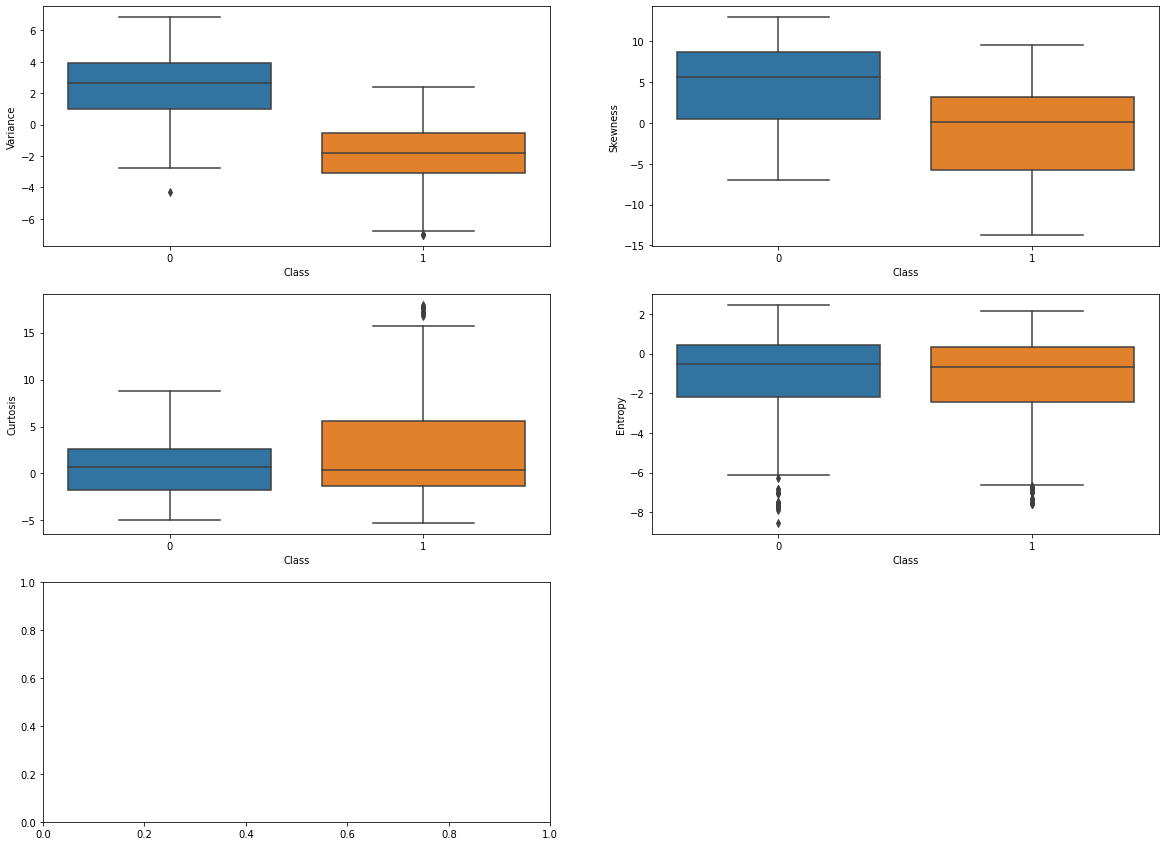

In [23]:
x = df['Class']

fig, axes = plt.subplots(3,2, figsize=(20,15))
fig.delaxes(axes[2][1])
sns.boxplot(y=df['Variance'], x = x, ax=axes[0][0])
sns.boxplot(y=df['Skewness'], x = x, ax=axes[0][1])
sns.boxplot(y=df['Curtosis'], x = x, ax=axes[1][0])
sns.boxplot(y=df['Entropy'], x = x, ax=axes[1][1])

### Remove further outliers

In [24]:
a = []
class_0 = df.loc[df['Class'] == 0]
class_1 = df.loc[df['Class'] == 1]

for i in list(class_0.loc[df['Variance'] < -4].index):
    a.append(i)
for i in list(class_0.loc[df['Entropy'] < -6].index):
    a.append(i)
for i in list(class_1.loc[df['Variance'] < -6.2].index):
    a.append(i)
for i in list(class_1.loc[df['Entropy'] < -6.2].index):
    a.append(i)

a

[349,
 41,
 45,
 59,
 194,
 202,
 291,
 341,
 394,
 465,
 495,
 529,
 543,
 562,
 581,
 606,
 677,
 740,
 806,
 837,
 867,
 959,
 989,
 1111,
 1142,
 1164,
 1172,
 1203,
 1225,
 1233,
 1264,
 1286,
 1294,
 776,
 791,
 837,
 852,
 858,
 898,
 959,
 974,
 981,
 1020,
 1081,
 1142,
 1157,
 1164,
 1203,
 1218,
 1224,
 1225,
 1264,
 1279,
 1285,
 1286,
 1325,
 1340]

In [25]:
df.drop(a, axis = 0, inplace = True)

In [26]:
df.shape

(1299, 5)

### Preprocess and Fit

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df.drop('Class', axis = 1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [29]:
X_train.shape

(1039, 4)

In [30]:
y_train.shape

(1039,)

In [31]:
X_train.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy'], dtype='object')

In [32]:
X_train.dtypes

Variance    float64
Skewness    float64
Curtosis    float64
Entropy     float64
dtype: object

#### Standard scaling numerical attributes and one hot encoding the categorical attribute - Species

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ])

num_attribs = ['Variance', 'Skewness', 'Curtosis', 'Entropy']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])

In [34]:
X_train_prepared = full_pipeline.fit_transform(X_train)

In [35]:
X_train_prepared.shape

(1039, 4)

In [36]:
X_test_prepared = full_pipeline.transform(X_test)

In [37]:
X_test_prepared.shape

(260, 4)

### Classification using decision tree classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

#### Default Setting

In [39]:
clf = DecisionTreeClassifier(random_state = 42)
clf = clf.fit(X_train_prepared, y_train)

In [40]:
y_pred = clf.predict(X_test_prepared)

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y_test, y_pred)

array([[149,   1],
       [  2, 108]])

In [43]:
from sklearn.metrics import classification_report

In [44]:
clf_report = classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       150
           1       0.99      0.98      0.99       110

    accuracy                           0.99       260
   macro avg       0.99      0.99      0.99       260
weighted avg       0.99      0.99      0.99       260



In [45]:
clf.score(X_test_prepared, y_test)

0.9884615384615385

In [46]:
clf.get_depth()

7

The model selects the best depth as 7

#### Trying max_depth = 7

In [47]:
clf = DecisionTreeClassifier(max_depth = 7, random_state = 42)
clf = clf.fit(X_train_prepared, y_train)

In [48]:
y_pred = clf.predict(X_test_prepared)

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
confusion_matrix(y_test, y_pred)

array([[149,   1],
       [  2, 108]])

In [51]:
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

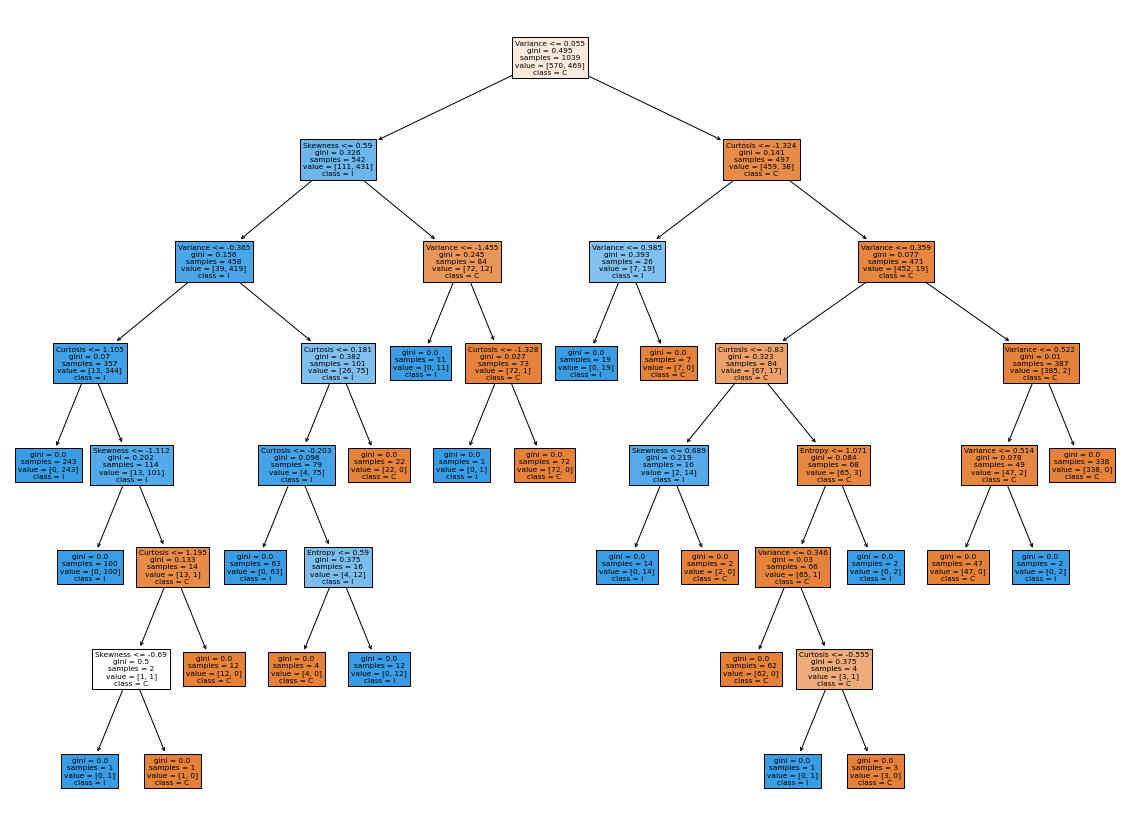

In [52]:
plt.figure(figsize = (20, 15))
_ = plot_tree(clf, feature_names = X_train.columns,  
                   class_names = y_train.name,
                   filled=True)

In [53]:
clf_report = classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       150
           1       0.99      0.98      0.99       110

    accuracy                           0.99       260
   macro avg       0.99      0.99      0.99       260
weighted avg       0.99      0.99      0.99       260



In [54]:
clf_report = classification_report(y_test, y_pred, output_dict = True)

In [55]:
clf_report['0']

{'precision': 0.9867549668874173,
 'recall': 0.9933333333333333,
 'f1-score': 0.9900332225913622,
 'support': 150}

In [56]:
clf.score(X_test_prepared, y_test)

0.9884615384615385

### Plotter Function

In [57]:
def plotter_function(test_parameter, counter, name):
    
    # model fitting and value extraction

    test_parameter = test_parameter
    score = []
    depth = []
    leaf = []
    class_0_f1 = []
    class_1_f1 = []

    for i in counter:
        
        # a workaround as was not able to pass sklearn class parameter as function parameter above
        
        if test_parameter == 1: 
            clf = DecisionTreeClassifier(max_depth = i, random_state = 42)
        elif test_parameter == 2:
            clf = DecisionTreeClassifier(max_features = i, random_state = 42)
        elif test_parameter == 3:
            clf = DecisionTreeClassifier(max_leaf_nodes = i, random_state = 42)
        else:
            clf = DecisionTreeClassifier(min_samples_split = i, random_state = 42)
            
            
        clf.fit(X_train_prepared, y_train)
        y_pred = clf.predict(X_test_prepared)
        score.append(clf.score(X_test_prepared, y_test) * 100)
        depth.append(clf.get_depth())
        leaf.append(clf.get_n_leaves())

        clf_report = classification_report(y_test, y_pred, output_dict = True)
        class_0_f1.append(clf_report['0']['f1-score'])
        class_1_f1.append(clf_report['1']['f1-score'])
    
    # plotting graphs
    
    x = counter
    y = score
    z = depth
    l = leaf
    m = class_0_f1
    n = class_1_f1

    fig, axes = plt.subplots(1, 2 , figsize=(20, 7))

    axes[0].plot(x, y, label = "Accuracy",marker='o', markerfacecolor='Black', markersize=8 , color='blue')
    axes[0].plot(x, z, label = "Depth",marker='o', markerfacecolor='Black', markersize=8 , color='red')
    axes[0].plot(x, l, label = "Leaf",marker='o', markerfacecolor='Black', markersize=8 , color='green')

    axes[0].set_title('Results On Test Set', size = 18)
    axes[0].set_xlabel(name, fontsize = 18)
    axes[0].set_ylabel('Value', fontsize = 18)
    axes[0].legend(fontsize = 20)
    axes[0].tick_params(axis='both', labelsize=20)

    axes[1].plot(x, m, label = "Class 0 F1_score",marker='o', markerfacecolor='red', markersize=8 , color='blue')
    axes[1].plot(x, n, label = "Class 1 F1_score",marker='o', markerfacecolor='brown', markersize=8 , color='red')
    axes[1].set_title('F1 score variation on test set', size = 18)
    axes[1].set_xlabel(name, fontsize = 18)
    axes[1].set_ylabel('Value', fontsize = 18)
    axes[1].legend(fontsize = 20)
    axes[1].tick_params(axis='both', labelsize=20)
    
    # tree
    plt.figure(figsize = (20, 15))
    _ = plot_tree(clf, feature_names = X_train.columns,  
                   class_names = y_train.name,
                   filled=True)

### Varying Max_Depth

In [58]:
max_depth_list = np.arange(1, 13, 1)

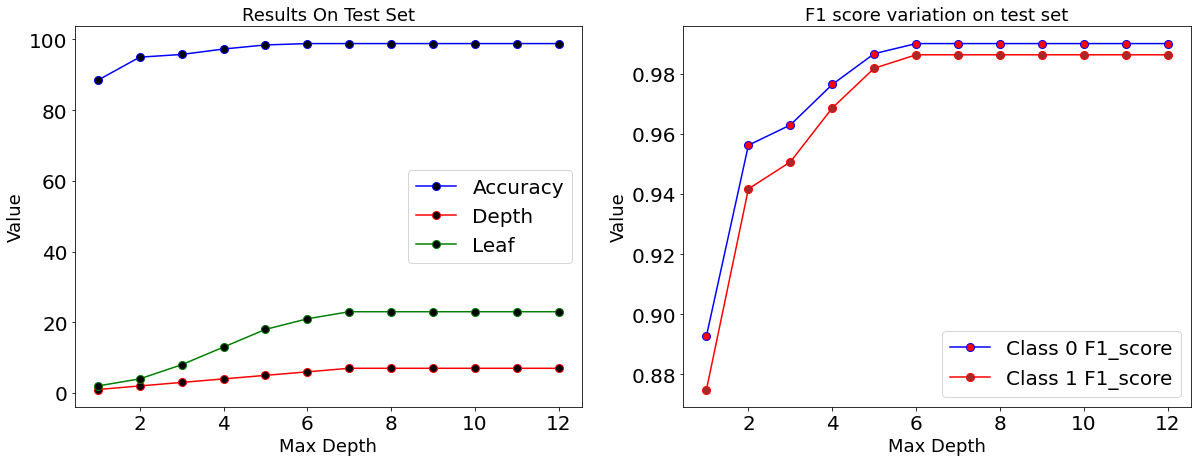

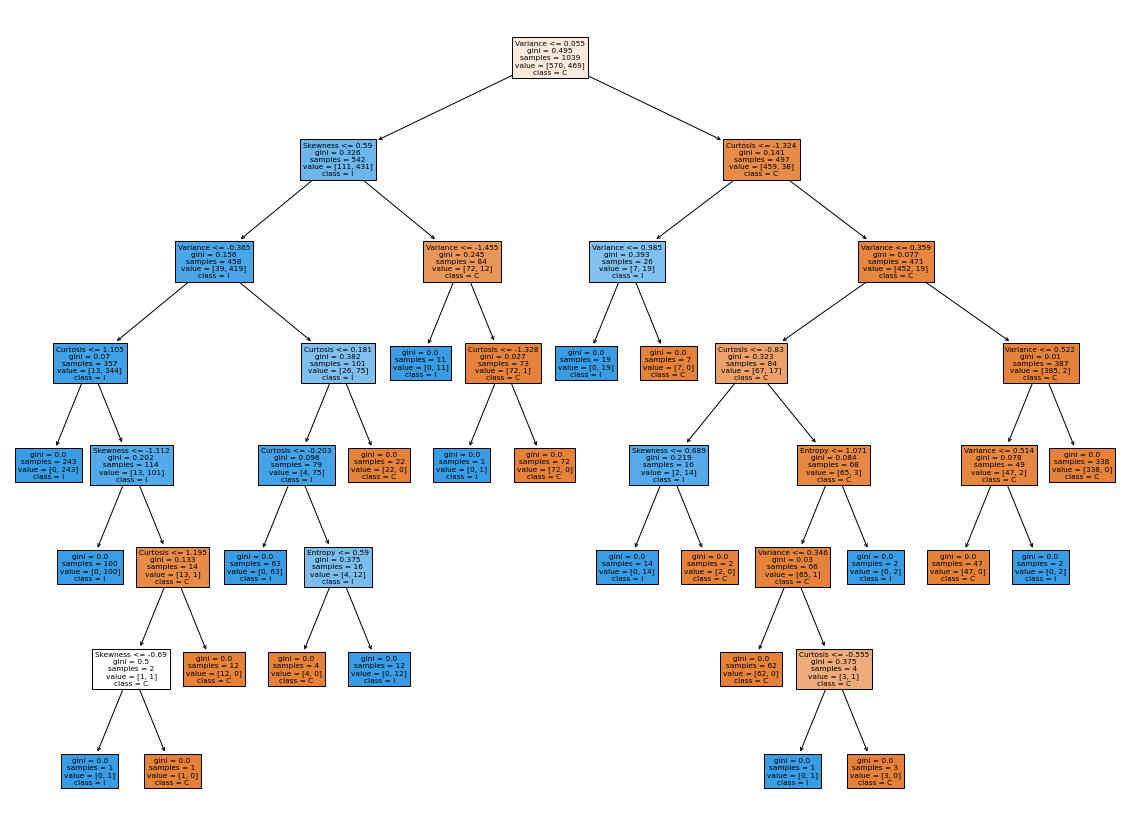

In [59]:
plotter_function(1, max_depth_list, 'Max Depth')

#### We can see the best results occur aroung max depth = 7 and accuracy stabilises post that.

### Varying Max_Features

In [60]:
max_features_list = np.arange(1, 5, 1)

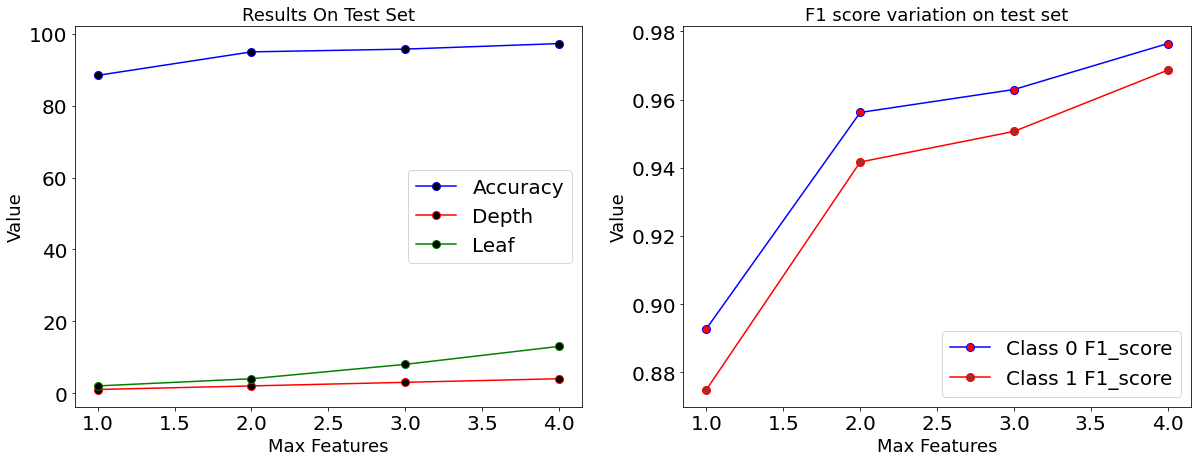

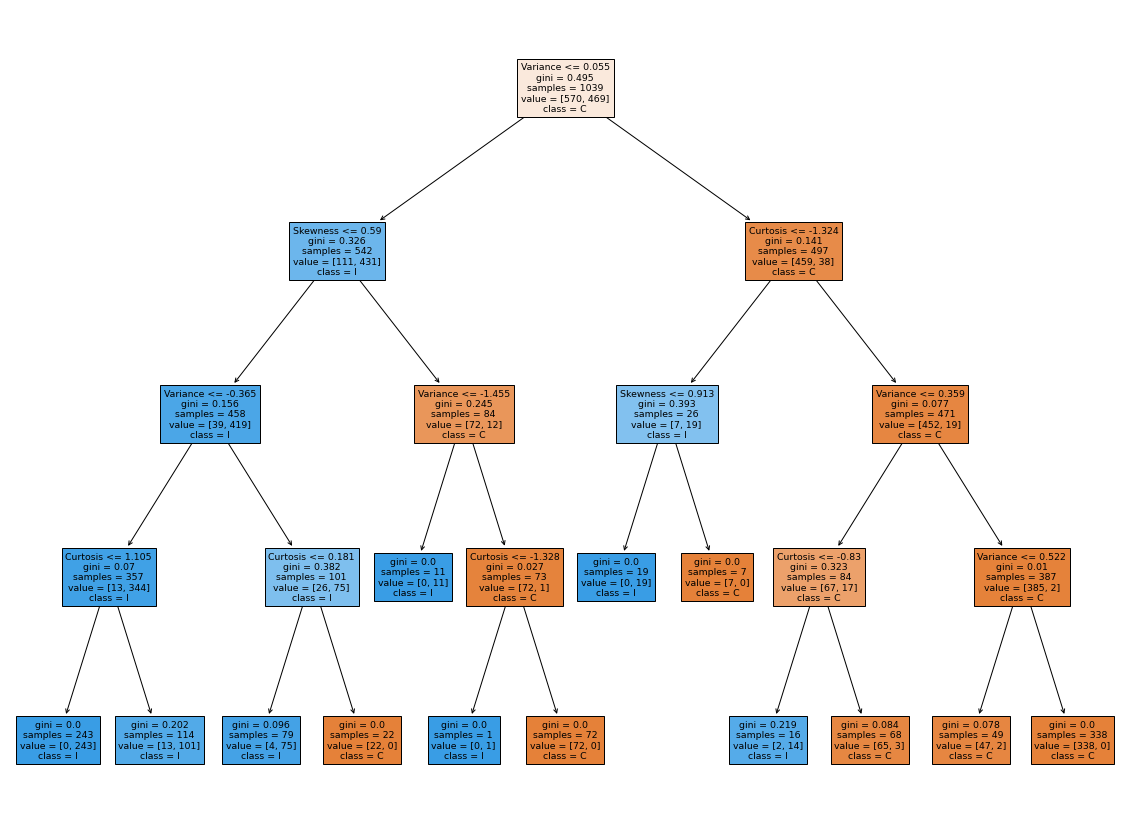

In [61]:
plotter_function(1, max_features_list, 'Max Features')

#### As the number of features increases, the accuracy improves.

### Varying max leaf nodes

In [62]:
max_leaves_list = np.arange(2, 25, 1)

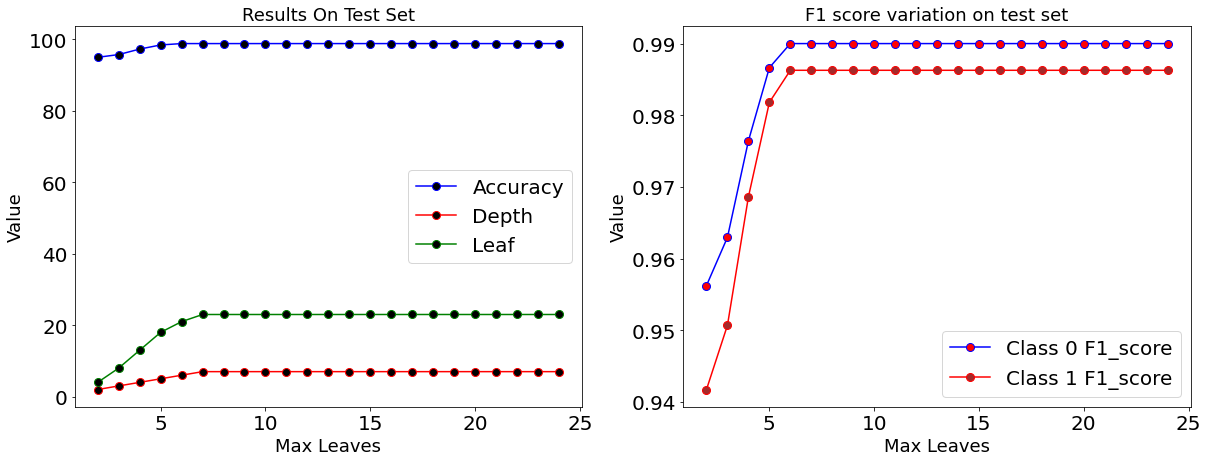

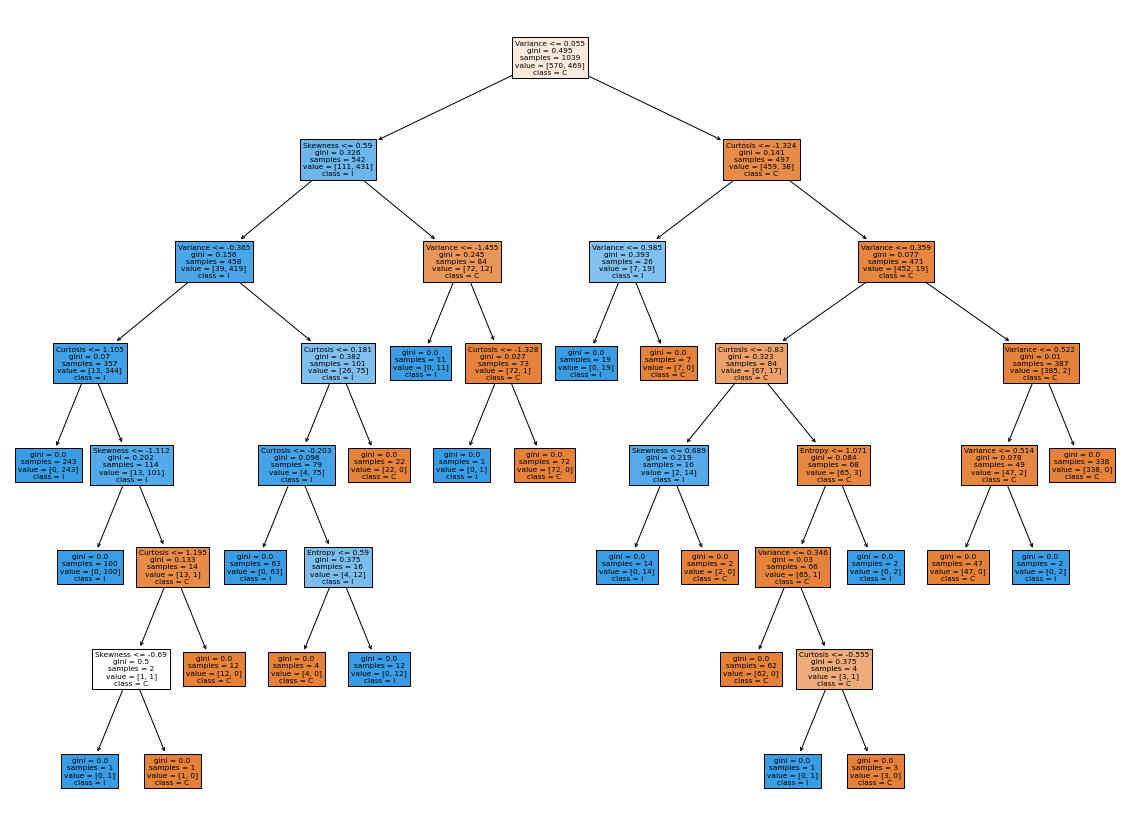

In [63]:
plotter_function(1, max_leaves_list, 'Max Leaves')

#### Accuracy increases till a value of around 6-7. It stabilises post that  showing no further improvements.

### Varying min_samples_split

In [64]:
min_split_value = np.arange(2, 500, 20)

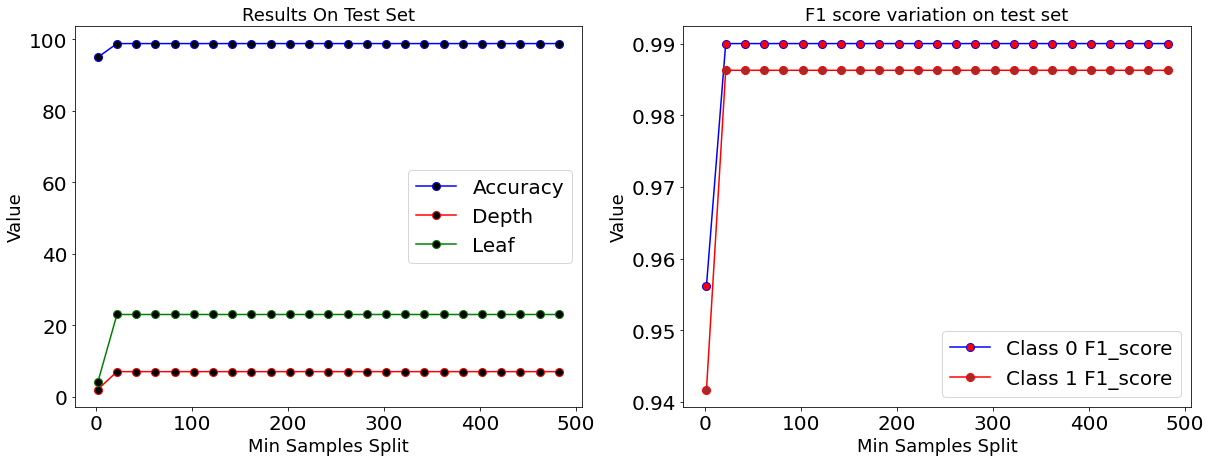

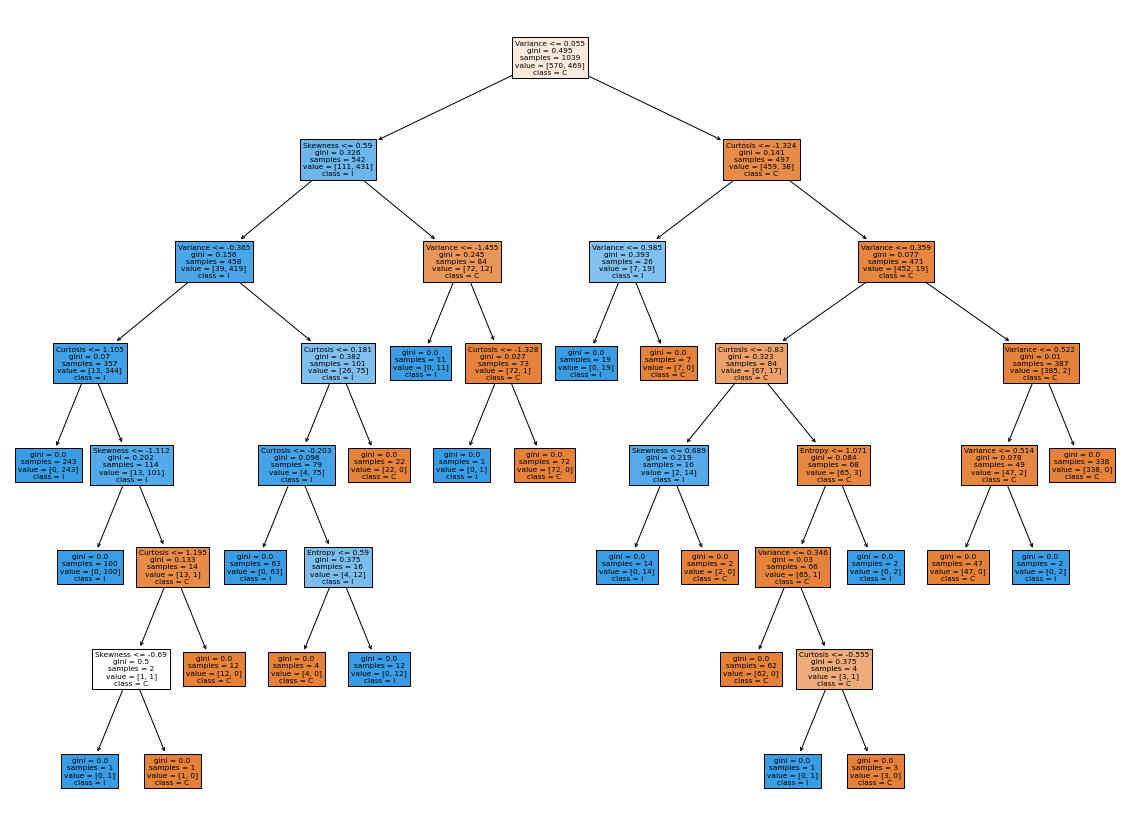

In [65]:
plotter_function(1, min_split_value, 'Min Samples Split')

## 02. Oil Spill Dataset

In [66]:
df = pd.read_csv("oil-spill.csv", header = None)

In [67]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [68]:
df.shape

(937, 50)

In [69]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
           dtype='int64')

In [70]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
dtype: int64

In [71]:
df.duplicated().sum()

0

In [72]:
df.shape

(937, 50)

In [73]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,937.000000,937.000000,937.000000,937.000000,937.000000,9.370000e+02,937.000000,937.000000,937.000000,937.000000,...,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000
mean,81.588047,332.842049,698.707086,870.992209,84.121665,7.696964e+05,43.242721,9.127887,3940.712914,0.221003,...,933.928677,427.565582,255.435902,106.112519,5.014002,0.128068,7985.718004,61.694386,8.119723,0.043757
std,64.976730,1931.938570,599.965577,522.799325,45.361771,3.831151e+06,12.718404,3.588878,8167.427625,0.090316,...,1001.681331,715.391648,534.306194,135.617708,5.029151,0.334344,6854.504915,10.412807,2.908895,0.204662
min,1.000000,10.000000,1.920000,1.000000,0.000000,7.031200e+04,21.240000,0.830000,667.000000,0.020000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2051.500000,35.950000,5.810000,0.000000
25%,31.000000,20.000000,85.270000,444.200000,54.000000,1.250000e+05,33.650000,6.750000,1371.000000,0.160000,...,450.000000,180.000000,90.800000,50.120000,2.370000,0.000000,3760.570000,65.720000,6.340000,0.000000
50%,64.000000,65.000000,704.370000,761.280000,73.000000,1.863000e+05,39.970000,8.200000,2090.000000,0.200000,...,685.420000,270.000000,161.650000,73.850000,3.850000,0.000000,5509.430000,65.930000,7.220000,0.000000
75%,124.000000,132.000000,1223.480000,1260.370000,117.000000,3.304680e+05,52.420000,10.760000,3435.000000,0.260000,...,1053.420000,460.980000,265.510000,125.810000,6.320000,0.000000,9521.930000,66.130000,7.840000,0.000000
max,352.000000,32389.000000,1893.080000,2724.570000,180.000000,7.131500e+07,82.640000,24.690000,160740.000000,0.740000,...,11949.330000,11500.000000,9593.480000,1748.130000,76.630000,1.000000,55128.460000,66.450000,15.440000,1.000000


In [74]:
df.describe(percentiles = [0.005, 0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 0.995])

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,937.000000,937.000000,937.000000,937.000000,937.000000,9.370000e+02,937.000000,937.000000,937.000000,937.000000,...,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000
mean,81.588047,332.842049,698.707086,870.992209,84.121665,7.696964e+05,43.242721,9.127887,3940.712914,0.221003,...,933.928677,427.565582,255.435902,106.112519,5.014002,0.128068,7985.718004,61.694386,8.119723,0.043757
std,64.976730,1931.938570,599.965577,522.799325,45.361771,3.831151e+06,12.718404,3.588878,8167.427625,0.090316,...,1001.681331,715.391648,534.306194,135.617708,5.029151,0.334344,6854.504915,10.412807,2.908895,0.204662
min,1.000000,10.000000,1.920000,1.000000,0.000000,7.031200e+04,21.240000,0.830000,667.000000,0.020000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2051.500000,35.950000,5.810000,0.000000
0.5%,1.000000,10.000000,3.000000,25.037600,0.000000,7.312500e+04,22.956800,1.420400,734.280000,0.036800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2210.545600,35.996800,5.870000,0.000000
1%,2.000000,10.000000,3.704400,45.724000,2.000000,7.875000e+04,23.458800,2.793600,757.000000,0.060000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2271.736000,36.023600,5.890000,0.000000
5%,6.000000,11.000000,13.092000,203.608000,13.000000,8.100000e+04,26.380000,5.034000,831.000000,0.110000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2553.542000,36.306000,5.980000,0.000000
10%,11.000000,12.000000,25.662000,283.470000,28.600000,8.910000e+04,29.136000,5.658000,937.000000,0.130000,...,270.000000,90.000000,25.460000,0.000000,1.000000,0.000000,2868.474000,36.660000,6.090000,0.000000
25%,31.000000,20.000000,85.270000,444.200000,54.000000,1.250000e+05,33.650000,6.750000,1371.000000,0.160000,...,450.000000,180.000000,90.800000,50.120000,2.370000,0.000000,3760.570000,65.720000,6.340000,0.000000
50%,64.000000,65.000000,704.370000,761.280000,73.000000,1.863000e+05,39.970000,8.200000,2090.000000,0.200000,...,685.420000,270.000000,161.650000,73.850000,3.850000,0.000000,5509.430000,65.930000,7.220000,0.000000


In [75]:
df.dtypes

0       int64
1       int64
2     float64
3     float64
4       int64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22      int64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34      int64
35      int64
36    float64
37    float64
38      int64
39      int64
40    float64
41    float64
42    float64
43    float64
44    float64
45      int64
46    float64
47    float64
48    float64
49      int64
dtype: object

In [76]:
df[49].value_counts()

0    896
1     41
Name: 49, dtype: int64

In [77]:
df.isin([0]).any()

0     False
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22     True
23    False
24    False
25    False
26    False
27     True
28    False
29    False
30     True
31     True
32     True
33     True
34    False
35    False
36     True
37    False
38    False
39    False
40     True
41     True
42     True
43     True
44     True
45     True
46    False
47    False
48    False
49     True
dtype: bool

### Removing outliers using std dev

In [78]:
from scipy import stats

z_scores = stats.zscore(df.drop(49, axis = 1))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_new = df[filtered_entries]

/Users/sc47/programs/main/venv/lib/python3.8/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [79]:
df_new.shape

(0, 50)

No outliers

<AxesSubplot:>

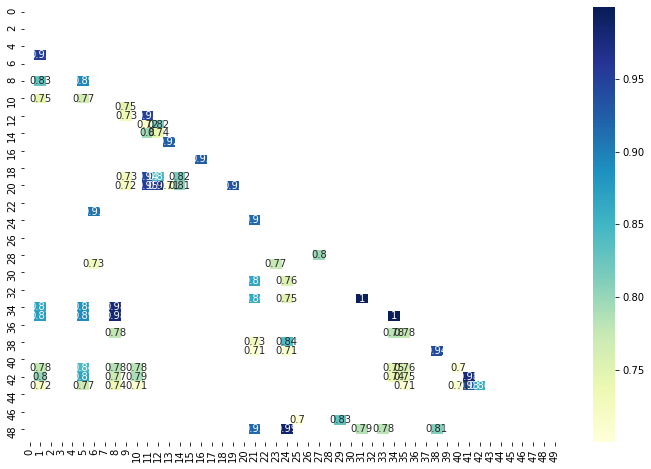

In [80]:
corr_mat = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat[corr_mat > 0.7], mask = np.triu(corr_mat), cmap="YlGnBu", annot = True)

### Preprocess and Fit

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X = df.drop(49, axis = 1)
y = df[49]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [83]:
X_train.shape

(749, 49)

In [84]:
y_train.shape

(749,)

In [85]:
X_train.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
           dtype='int64')

In [86]:
X_train.dtypes

0       int64
1       int64
2     float64
3     float64
4       int64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22      int64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34      int64
35      int64
36    float64
37    float64
38      int64
39      int64
40    float64
41    float64
42    float64
43    float64
44    float64
45      int64
46    float64
47    float64
48    float64
dtype: object

#### Standard scaling numerical attributes and one hot encoding the categorical attribute - Species

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ])

num_attribs = list(X_train.columns)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])

In [88]:
X_train_prepared = full_pipeline.fit_transform(X_train)

In [89]:
X_train_prepared.shape

(749, 49)

In [90]:
X_test_prepared = full_pipeline.transform(X_test)

In [91]:
X_test_prepared.shape

(188, 49)

### Classification using decision tree classifier

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

#### Default Setting

In [93]:
clf = DecisionTreeClassifier(random_state = 42)
clf = clf.fit(X_train_prepared, y_train)

In [94]:
y_pred = clf.predict(X_test_prepared)

In [95]:
from sklearn.metrics import confusion_matrix

In [96]:
confusion_matrix(y_test, y_pred)

array([[175,   7],
       [  1,   5]])

In [97]:
from sklearn.metrics import classification_report

In [98]:
clf_report = classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       182
           1       0.42      0.83      0.56         6

    accuracy                           0.96       188
   macro avg       0.71      0.90      0.77       188
weighted avg       0.98      0.96      0.96       188



In [99]:
clf.score(X_test_prepared, y_test)

0.9574468085106383

In [100]:
clf.get_depth()

11

The model selects the best depth as 11

#### Trying max_depth = 11

In [101]:
clf = DecisionTreeClassifier(max_depth = 7, random_state = 42)
clf = clf.fit(X_train_prepared, y_train)

In [102]:
y_pred = clf.predict(X_test_prepared)

In [103]:
from sklearn.metrics import confusion_matrix

In [104]:
confusion_matrix(y_test, y_pred)

array([[178,   4],
       [  1,   5]])

In [105]:
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

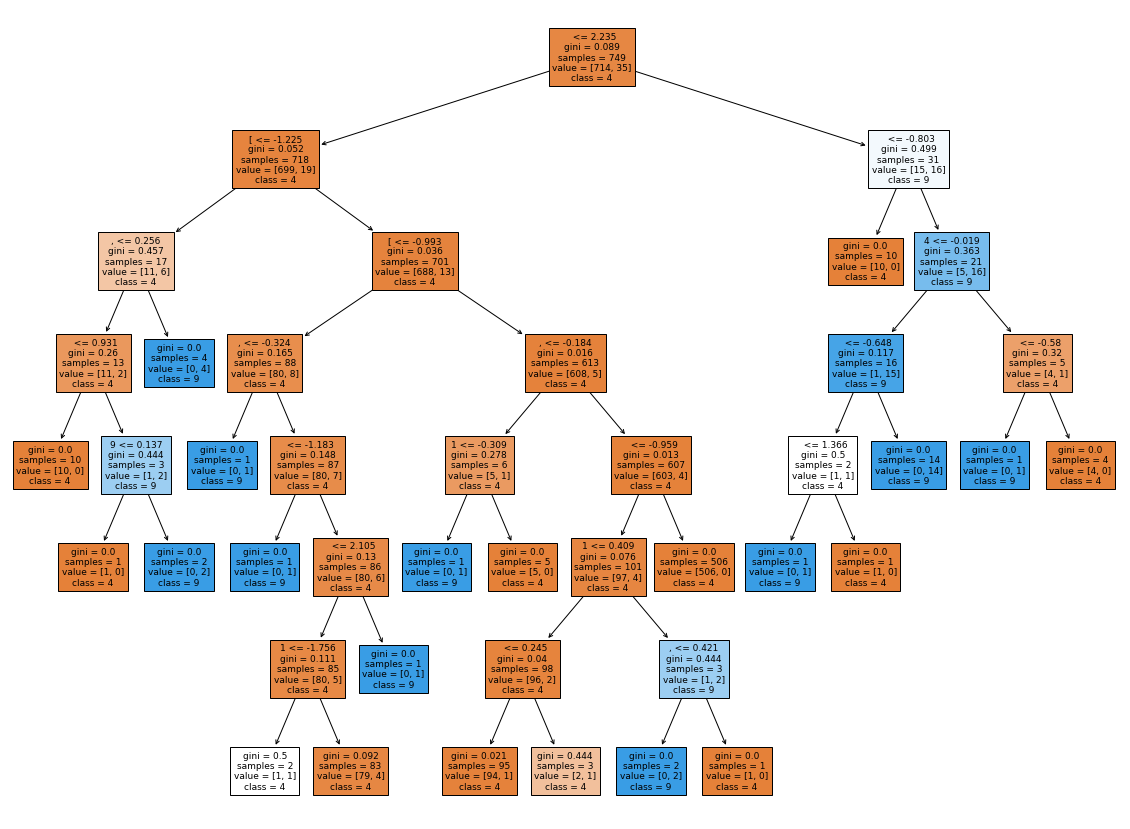

In [106]:
plt.figure(figsize = (20, 15))
_ = plot_tree(clf, feature_names = str(list(X_train.columns)),
                   class_names = str(y_train.name),
                   filled=True)

In [107]:
clf_report = classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       182
           1       0.56      0.83      0.67         6

    accuracy                           0.97       188
   macro avg       0.77      0.91      0.83       188
weighted avg       0.98      0.97      0.98       188



In [108]:
clf_report = classification_report(y_test, y_pred, output_dict = True)

In [109]:
clf_report['0']

{'precision': 0.994413407821229,
 'recall': 0.978021978021978,
 'f1-score': 0.9861495844875345,
 'support': 182}

In [110]:
clf.score(X_test_prepared, y_test)

0.973404255319149

### Plotter Function

In [111]:
def plotter_function(test_parameter, counter, name):
    
    # model fitting and value extraction

    test_parameter = test_parameter
    score = []
    depth = []
    leaf = []
    class_0_f1 = []
    class_1_f1 = []

    for i in counter:
        
        # a workaround as was not able to pass sklearn class parameter as function parameter above
        
        if test_parameter == 1: 
            clf = DecisionTreeClassifier(max_depth = i, random_state = 42)
        elif test_parameter == 2:
            clf = DecisionTreeClassifier(max_features = i, random_state = 42)
        elif test_parameter == 3:
            clf = DecisionTreeClassifier(max_leaf_nodes = i, random_state = 42)
        else:
            clf = DecisionTreeClassifier(min_samples_split = i, random_state = 42)
            
            
        clf.fit(X_train_prepared, y_train)
        y_pred = clf.predict(X_test_prepared)
        score.append(clf.score(X_test_prepared, y_test) * 100)
        depth.append(clf.get_depth())
        leaf.append(clf.get_n_leaves())

        clf_report = classification_report(y_test, y_pred, output_dict = True)
        class_0_f1.append(clf_report['0']['f1-score'])
        class_1_f1.append(clf_report['1']['f1-score'])
    
    # plotting graphs
    
    x = counter
    y = score
    z = depth
    l = leaf
    m = class_0_f1
    n = class_1_f1

    fig, axes = plt.subplots(1, 2 , figsize=(20, 7))

    axes[0].plot(x, y, label = "Accuracy",marker='o', markerfacecolor='Black', markersize=8 , color='blue')
    axes[0].plot(x, z, label = "Depth",marker='o', markerfacecolor='Black', markersize=8 , color='red')
    axes[0].plot(x, l, label = "Leaf",marker='o', markerfacecolor='Black', markersize=8 , color='green')

    axes[0].set_title('Results On Test Set', size = 18)
    axes[0].set_xlabel(name, fontsize = 18)
    axes[0].set_ylabel('Value', fontsize = 18)
    axes[0].legend(fontsize = 20)
    axes[0].tick_params(axis='both', labelsize=20)

    axes[1].plot(x, m, label = "Class 0 F1_score",marker='o', markerfacecolor='red', markersize=8 , color='blue')
    axes[1].plot(x, n, label = "Class 1 F1_score",marker='o', markerfacecolor='brown', markersize=8 , color='red')
    axes[1].set_title('F1 score variation on test set', size = 18)
    axes[1].set_xlabel(name, fontsize = 18)
    axes[1].set_ylabel('Value', fontsize = 18)
    axes[1].legend(fontsize = 20)
    axes[1].tick_params(axis='both', labelsize=20)
    
    # tree
    plt.figure(figsize = (20, 15))
    _ = plot_tree(clf, feature_names = str(list(X_train.columns)),  
                   class_names = str(y_train.name),
                   filled=True)

### Varying Max_Depth

In [112]:
max_depth_list = np.arange(1, 15, 1)

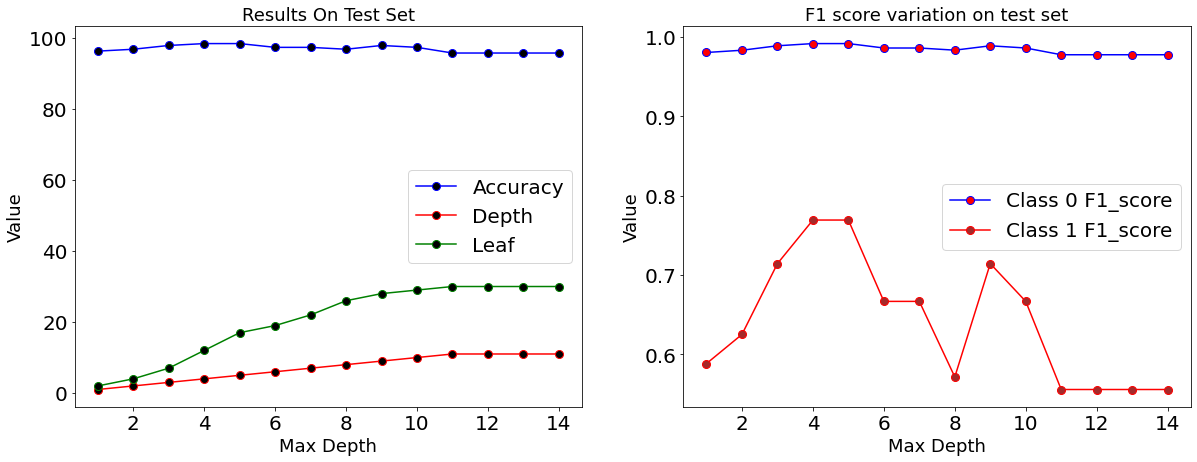

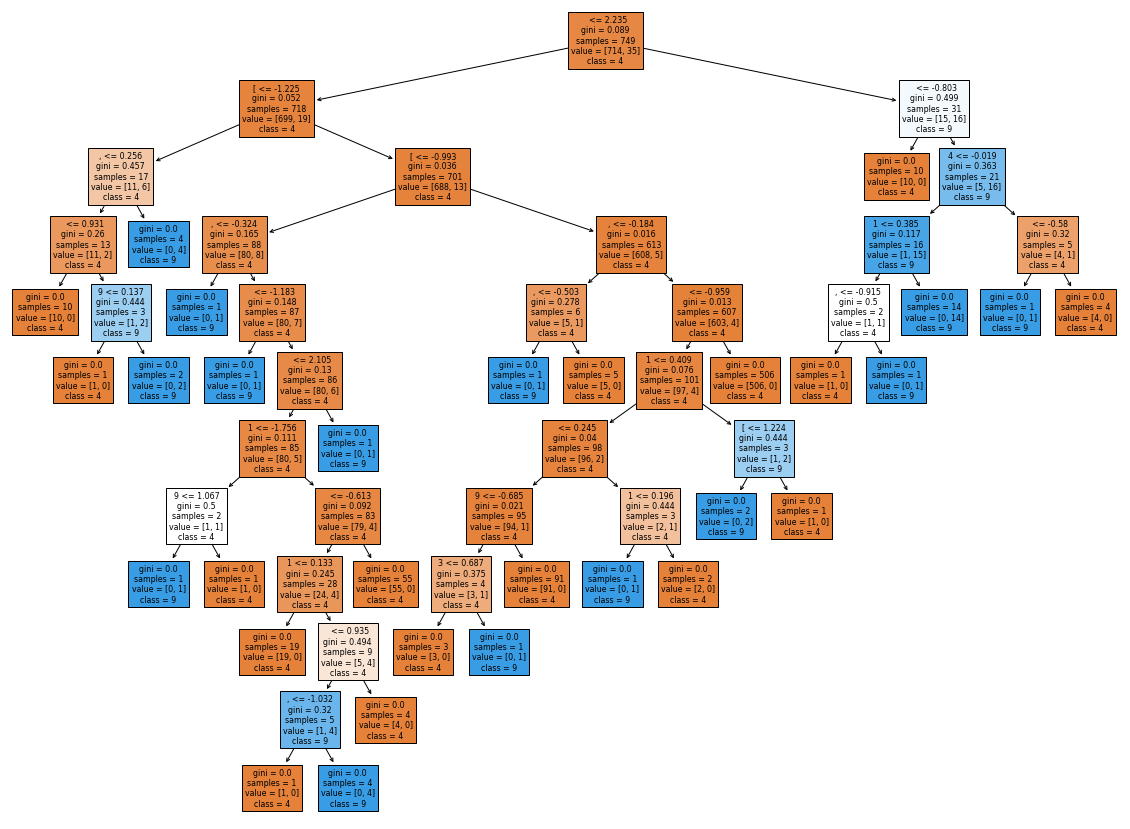

In [113]:
plotter_function(1, max_depth_list, 'Max Depth')

#### Max_Depth of 11 is said to be best, but, to get a better f1 score for class 1 as well, we can go with max_depth of 4 or 5.

### Varying Max_Features

In [114]:
max_features_list = np.arange(1, 15, 1)

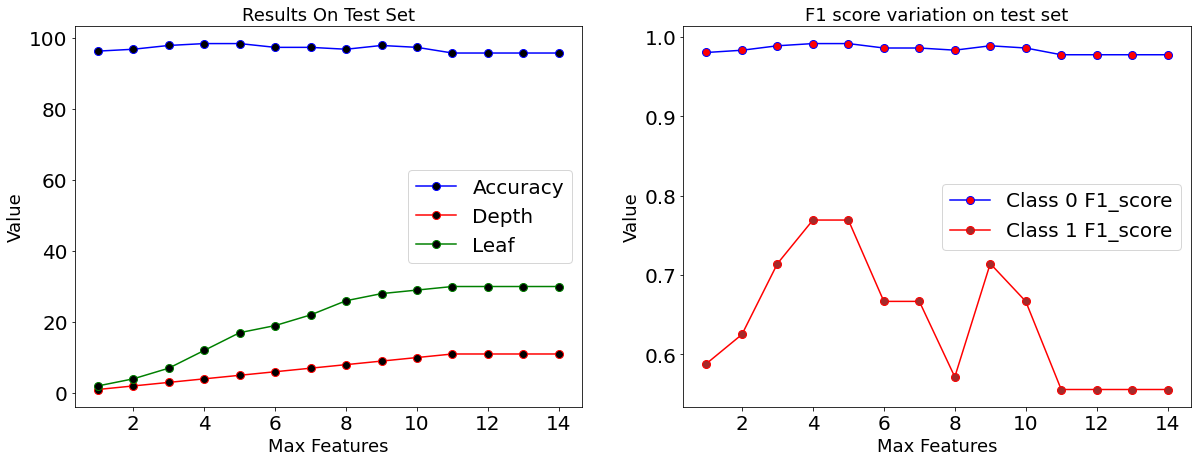

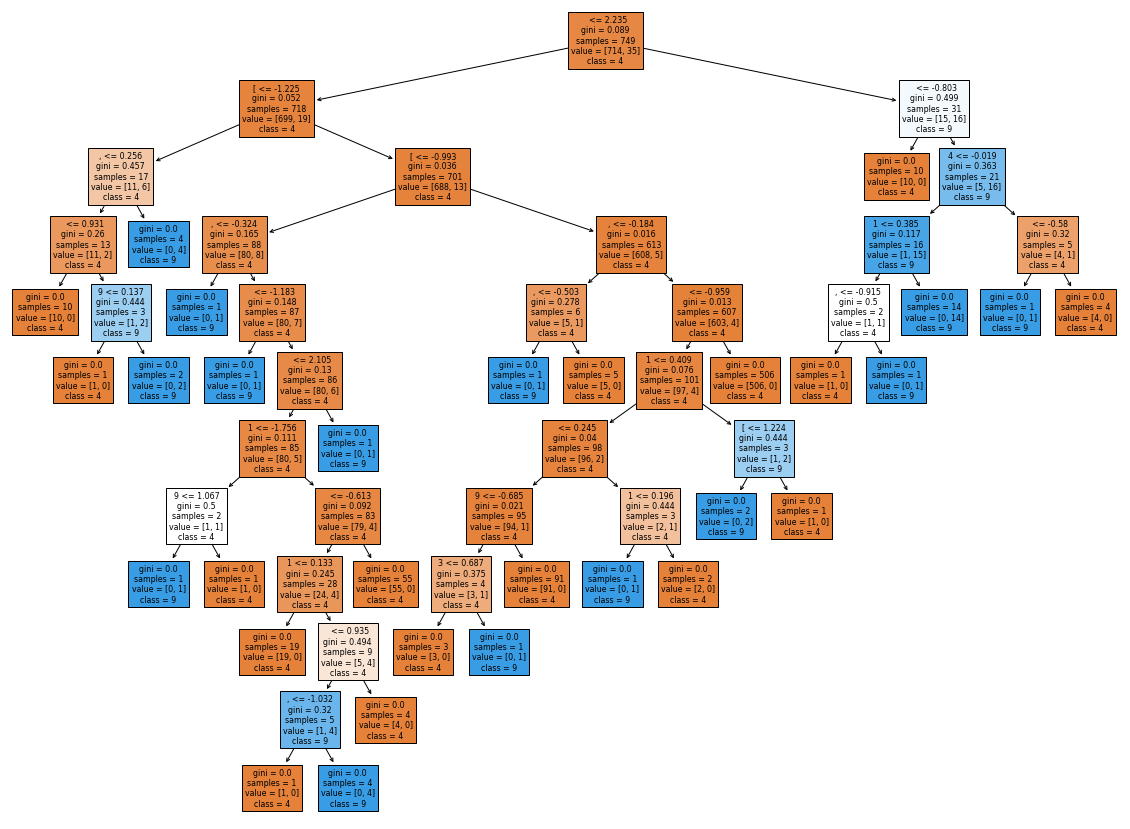

In [115]:
plotter_function(1, max_features_list, 'Max Features')

#### Accuracy is pretty consistent, but, for a better all around f1 score for both classes, max features = 4 ot 5 can be chosen.

### Varying max leaf nodes

In [116]:
max_leaves_list = np.arange(2, 20, 1)

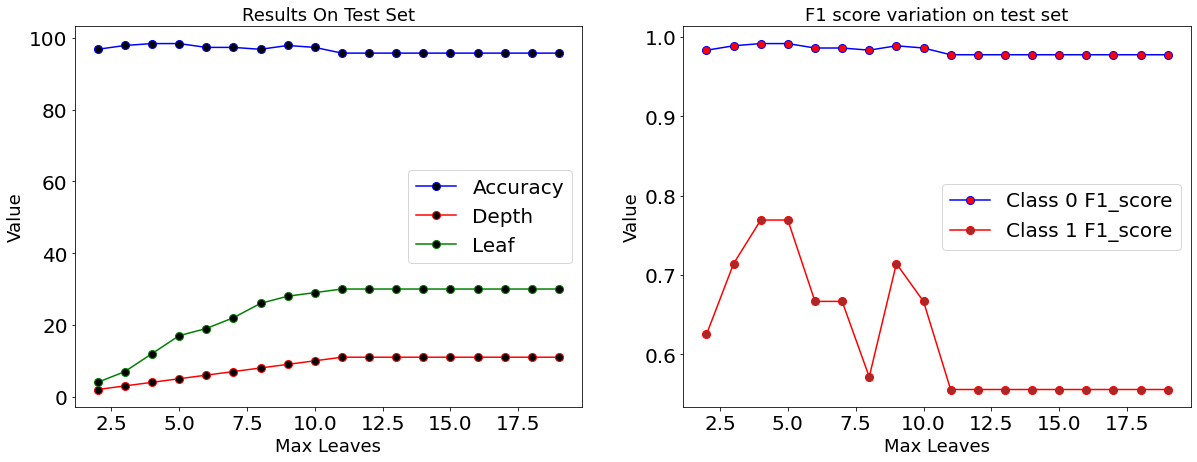

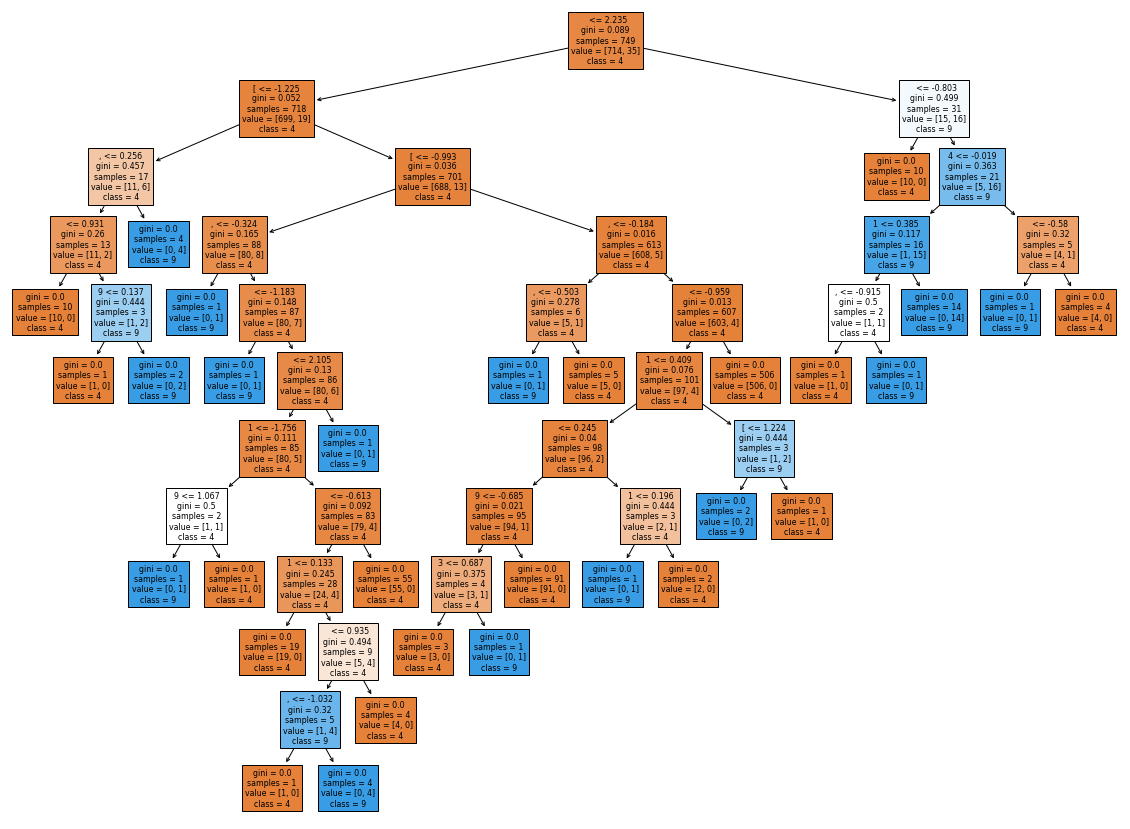

In [117]:
plotter_function(1, max_leaves_list, 'Max Leaves')

#### Accuracy is pretty consistent, but, for a better all around f1 score for both classes, max leaves = 4 ot 5 can be chosen.

### Varying min_samples_split

In [118]:
min_split_value = np.arange(2, 500, 20)

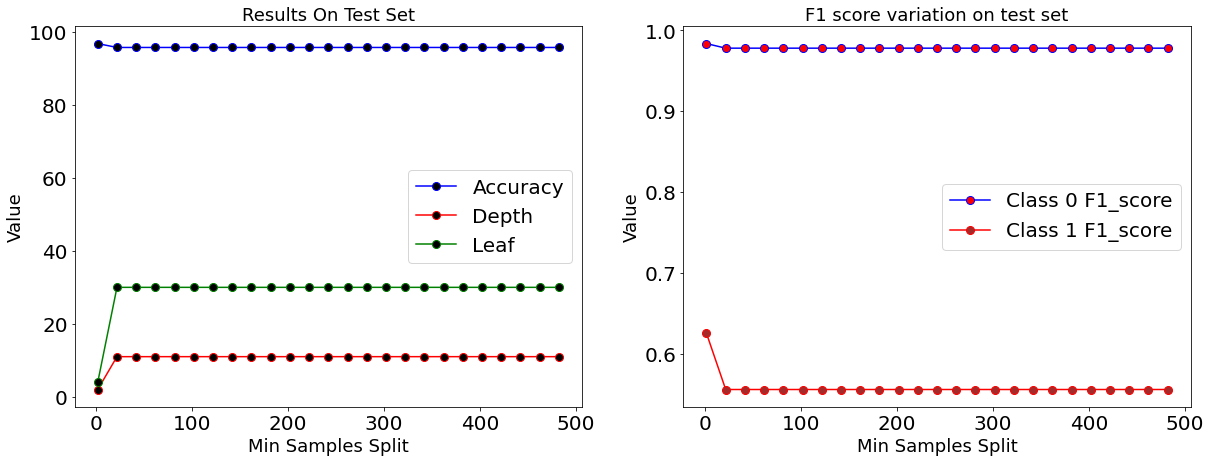

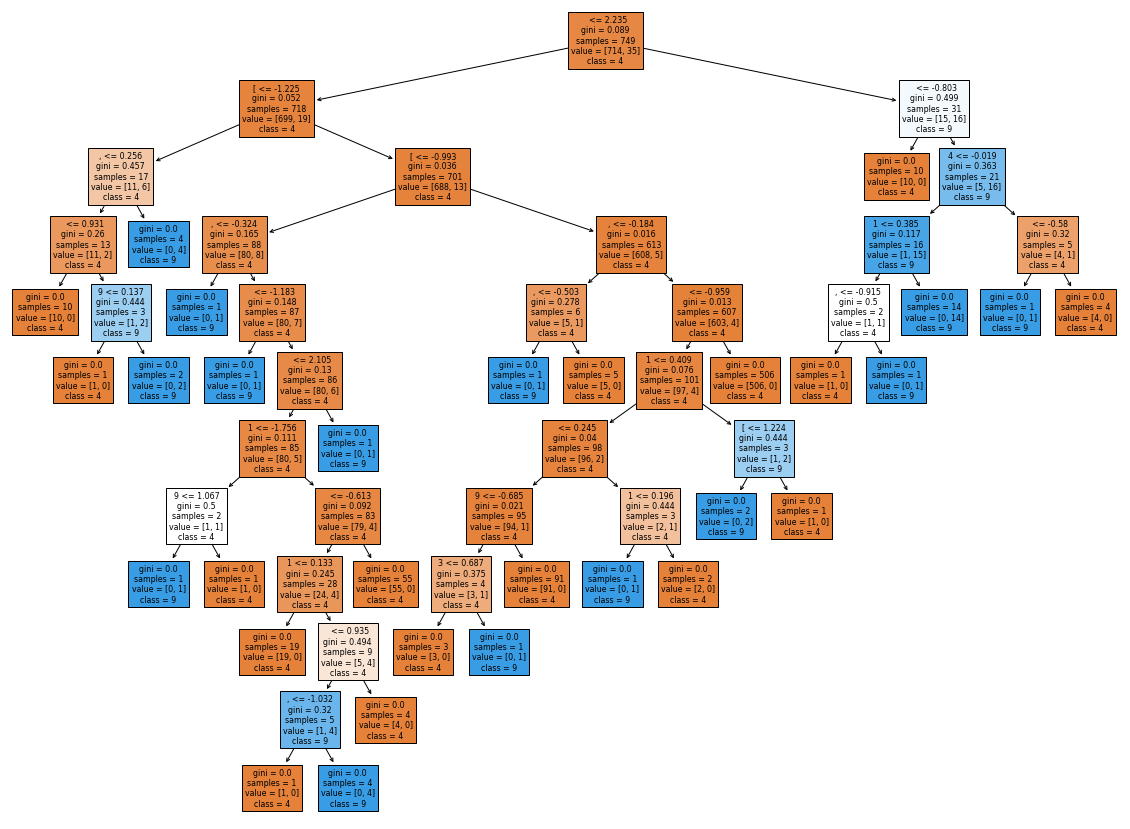

In [119]:
plotter_function(1, min_split_value, 'Min Samples Split')

In [120]:
end_time = datetime.datetime.now()
print("End Time: ", end_time)

End Time:  2021-04-07 23:32:01.564156


In [121]:
duration = start_time - end_time
duration_in_s = duration.total_seconds()
minutes = divmod(duration_in_s, 60)[0]
print("Total Execution Time In Seconds: ", -duration_in_s, "seconds")
print("Total Execution Time In Minutes: ", -minutes, "minutes")

Total Execution Time In Seconds:  63.375294 seconds
Total Execution Time In Minutes:  2.0 minutes
